In [187]:
# Task 1
import pydicom as pyd
import numpy as np
import os
import matplotlib.pyplot as plt
dicom_path="./Lung-DICOM"
dcm_files=[]
for root,dirs,files in os.walk(dicom_path):
   for filename in files:# To seperate the files
    if ".dcm" in filename.lower():
        dcm_files.append(os.path.join(root,filename))
dcm_files
print(dcm_files[0])
ds=dcm_files[0] # dss is a string here!
print(ds)
dc=pyd.dcmread(ds) # ds is the required dataset derived from that ingle DICOM file.
# dss.add_new(tags,'DS',value)
# We'll be using this.




./Lung-DICOM\1.3.6.1.4.1.40744.29.282967364651788470277412461462049836277-0-1-sks439.dcm
./Lung-DICOM\1.3.6.1.4.1.40744.29.282967364651788470277412461462049836277-0-1-sks439.dcm


In [167]:
# We can also change the value of any metacharachter used here.
dc[0x18,0x50].value="4"#We changed the value from 3 to 4


In [168]:
dc[0x18,0x50].value="3"

In [169]:
dc


(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.40744.29.309093436465192420112014607036573091300
(0008, 0020) Study Date                          DA: '20180212'
(0008, 0021) Series Date                         DA: '20180212'
(0008, 0022) Acquisition Date                    DA: '20180212'
(0008, 0023) Content Date                        DA: '20180212'
(0008, 0030) Study Time                          TM: '215029'
(0008, 0031) Series Time                         TM: '215029'
(0008, 0032) Acquisition Time                    TM: '215029'
(0008, 0033) Content Time                        TM: '215029'
(0008, 0050) Accession Number                    SH: '2819497684894126'
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) Ma

In [171]:
ConstPixelSpacing=(float(dc.PixelSpacing[0]),float(dc.PixelSpacing[1]),float(dc.SliceThickness))
#  PixelSpacing and SliceThickness attributes to calculate the spacing between pixels in the three axes.
#Argument1:alongx-axis,arg2:along-y axis spacing,arg3:The slice thickness along z axis

In [159]:
ConstPixelDims=(int(dc.Rows),int(dc.Columns),int(len(dcm_files)))
# We are storing dimensions in this (Number of pixel rows in a slice) x (
# Number of pixel columns in a slice) x (Number of slices) 

In [160]:
print(ConstPixelSpacing)

(0.9765625, 0.9765625, 3.0)


In [161]:
# Creating an array for x, y, and z axis respectively for storing the actual
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])
# The third argument makes division of pixels

In [162]:
ds.pixel_array.shape

(512, 512)

In [178]:
dc.pixel_array[2]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 25, 26

In [176]:
# On the basis of dimensions stored, we can now create an array like this
ArrayDCM=np.zeros(ConstPixelDims,dtype=dc.pixel_array.dtype)#Here pixel_array is a property of pydicom used
# as a method. We are deriving the required data type from it. In this case int16. 
# pixel_array object is a pure np array containing the pixel-data for the particular DICOM slice


print(ArrayDCM[1:3])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [185]:
# Task 2
for filenameDCM in dcm_files:
    # read the file
    dc1 = pyd.dcmread(filenameDCM)
    # store the raw image data
    ArrayDCM[:, :, dcm_files.index(filenameDCM)] = dc1.pixel_array  

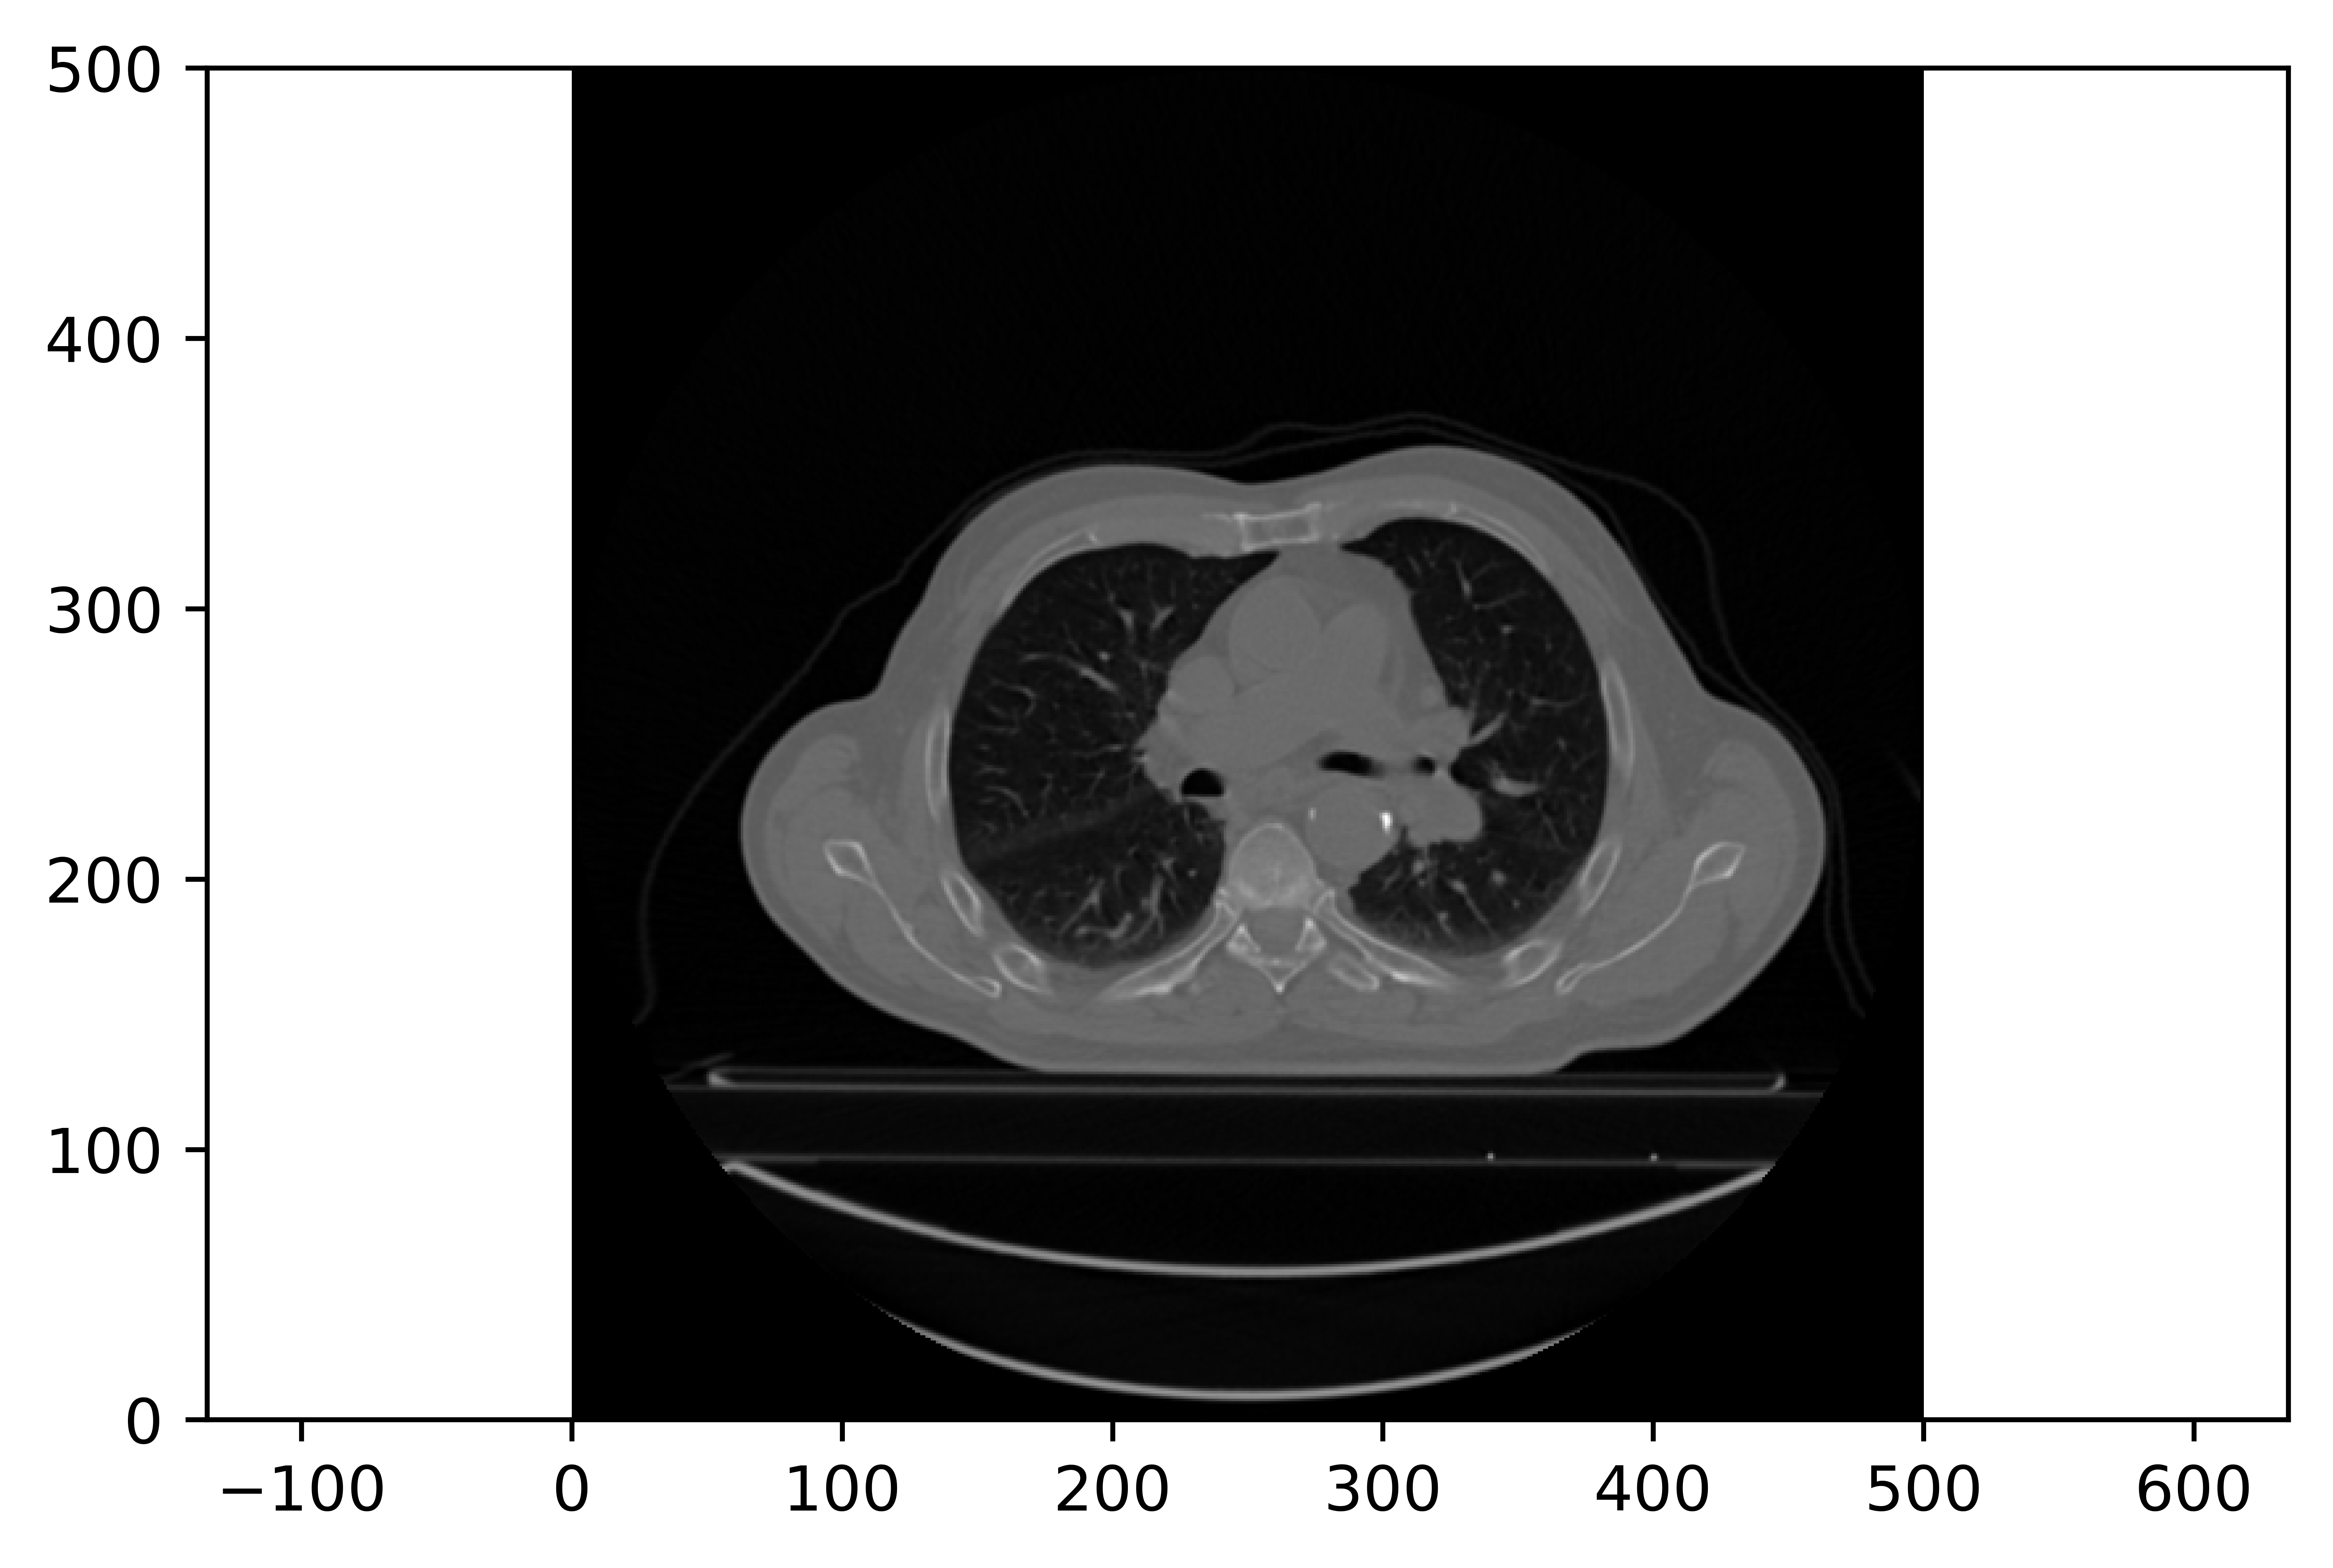

In [186]:
plt.figure(dpi=1200)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, np.flipud(ArrayDCM[:, :, 90]))

In [182]:
plt.show()